# TLRY Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_tlry = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/tlry.csv')
df_tlry['Date'] = pd.to_datetime(df_tlry['Date'])
df_tlry = df_tlry.set_index('Date')
df_tlry = df_tlry.rename(columns={'Open':'tlry_Open', 'High':'tlry_High', 'Low':'tlry_Low', 'Close':'tlry_Close', 'Volume':'tlry_Volume'})
df_tlry = df_tlry.drop('Adj Close', axis=1)
df_tlry['tlry_prev_close'] = df_tlry['tlry_Close'].shift(1)
df_tlry['tlry_next_close'] = df_tlry['tlry_Close'].shift(-1)
df_tlry['tlry_diff'] = df_tlry['tlry_Close'].diff()
df_tlry['tlry_%change'] = df_tlry['tlry_Close'].pct_change()
df_tlry['tlry_5day_avg_close'] = df_tlry['tlry_Close'].rolling(5).mean()
df_tlry['tlry_5day_avg_diff'] = df_tlry['tlry_diff'].rolling(5).mean()
df_tlry['tlry_10day_avg_close'] = df_tlry['tlry_Close'].rolling(10).mean()
df_tlry['tlry_10day_avg_diff'] = df_tlry['tlry_diff'].rolling(10).mean()

In [4]:
df_tlry

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000              NaN  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff  
Date                             
2018-07-19                  NaN  
2018-07-20                  NaN  
2018-07-23                  NaN  
2018-07-24                  NaN  
2018-07-25                  NaN  
...                         ...  
2022-05-17               -0.004  
2022-05-18               -0.051  
2022-05-19               -0.003  
2022-05-20               -0.002  
2022-05-23                0.010  

[969 rows x 13 columns]

In [5]:
cut = df_tlry.index.min()
cut

Timestamp('2018-07-19 00:00:00')

Text(0.5, 0, 'TLRY Close')

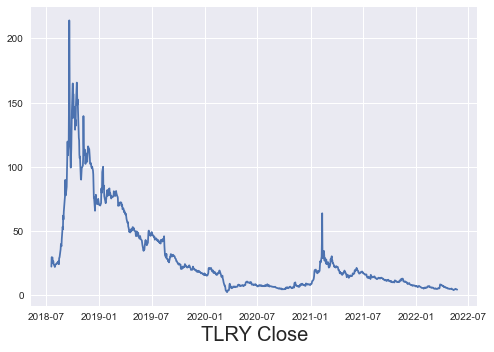

In [6]:
plt.plot(df_tlry['tlry_Close'])
plt.xlabel('TLRY Close', fontsize=20)

## TLRY and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_tlry, df_dow, on='Date', how='left')
df0

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000              NaN  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  NaN   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  NaN   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  NaN   25036.90   25081.45  24983.33    25044.29   
2018-07-24                  NaN   25092.43   25286.62  25092.43    25241.94   
2018-07-25                  NaN   25183.70   25432.87  25113.55    25414.10   
...                         ...        ...        ...       ...         ...   
2022-05-17               -0.004   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.051   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.003   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.002   31426.94   31515.78  30635.76    31261.90   
2022-05-23                0.010   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                   

In [9]:
df_isna0 = df0.isna()
df_isna0

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                 True      False      False     False       False   
2018-07-20                 True      False      False     False       False   
2018-07-23                 True      False      False     False       False   
2018-07-24                 True      False      False     False       False   
2018-07-25                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-17                False      False      False     False       False   
2022-05-18                False      False      False     False       False   
2022-05-19                False      False      False     False       False   
2022-05-20                False      False      False     False       False   
2022-05-23                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  0.0   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  0.0   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  0.0   25036.90   25081.45  24983.33    25044.29   
2018-07-24                  0.0   25092.43   25286.62  25092.43    25241.94   
2018-07-25                  0.0   25183.70   25432.87  25113.55    25414.10   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-07-19  285749714.0         25199.29         25058.12    -134.79   
2018-07-20  274084814.0         25064.50         25044.29      -6.38   
2018-07-23  228814553.0         25058.12         25241.94     -13.83   
2018-07-24  274921716.0         25044.29         25414.10     197.65   
2018-07-25  273716533.0         25241.94         25527.07     172.16   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-07-19     -0.005349            25093.490              27.922   
2018-07-20     -0.000255            25101.232               7.742   
2018-07-23     -0.000552            25097.218              -4.014   
2018-07-24      0.007892            25121.628              24.410   
2018-07-25      0.006820            25164.590              42.962   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-07-19             24924.552               70.776  
2018-07-20             24984.716               60.164  
2018-07-23             25011.486               26.770  
2018-07-24             25043.714               32.228  
2018-07-25             25115.079               71.365

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000         0.000000  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                0.000   25139.15   25154.17  25052.62    25064.50   
2018-07-20                0.000   25041.14   25124.10  24986.35    25058.12   
2018-07-23                0.000   25036.90   25081.45  24983.33    25044.29   
2018-07-24                0.000   25092.43   25286.62  25092.43    25241.94   
2018-07-25                0.000   25183.70   25432.87  25113.55    25414.10   
...                         ...        ...        ...       ...         ...   
2022-05-17               -0.004   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.051   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.003   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.002   31426.94   31515.78  30635.76    31261.90   
2022-05-23                0.010   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                   

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000                 0.0   
2018-07-20   7.380001      0.329611                0.000                 0.0   
2018-07-23  -0.319999     -0.010749                0.000                 0.0   
2018-07-24  -4.090000     -0.138879                0.000                 0.0   
2018-07-25   1.129999      0.044558               26.692                 0.0   

            tlry_10day_avg_close  tlry_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2018-07-19                   0.0                  0.0   25139.15   25154.17   
2018-07-20                   0.0                  0.0   25041.14   25124.10   
2018-07-23                   0.0                  0.0   25036.90   25081.45   
2018-07-24                   0.0                  0.0   25092.43   25286.62   
2018-07-25                   0.0                  0.0   25183.70   25432.87   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-07-19  25052.62    25064.50  285749714.0         25199.29   
2018-07-20  24986.35    25058.12  274084814.0         25064.50   
2018-07-23  24983.33    25044.29  228814553.0         25058.12   
2018-07-24  25092.43    25241.94  274921716.0         25044.29   
2018-07-25  25113.55    25414.10  273716533.0         25241.94   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-07-19         25058.12    -134.79     -0.005349            25093.490   
2018-07-20         25044.29      -6.38     -0.000255            25101.232   
2018-07-23         25241.94     -13.83     -0.000552            25097.218   
2018-07-24         25414.10     197.65      0.007892            25121.628   
2018-07-25         25527.07     172.16      0.006820            25164.590   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-07-19              27.922             24924.552               70.776   
2018-07-20               7.742             24984.716               60.164   
2018-07-23              -4.014             25011.486               26.770   
2018-07-24              24.410             25043.714               32.228   
2018-07-25              42.962             25115.079               71.365   

            tlry_Open_b  tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                                            
2018-07-19        False        False       False         False          False   
2018-07-20        False        False       False         False          False   

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(968, 56)

In [18]:
n = int(len(df0) * 0.9)
n

871

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

871
97


In [21]:
X_train0 = train0.drop('tlry_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  0.0   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  0.0   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  0.0   25036.90   25081.45  24983.33    25044.29   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-07-19  285749714.0         25199.29         25058.12    -134.79   
2018-07-20  274084814.0         25064.50         25044.29      -6.38   
2018-07-23  228814553.0         25058.12         25241.94     -13.83   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-07-19     -0.005349            25093.490              27.922   
2018-07-20     -0.000255            25101.232               7.742   
2018-07-23     -0.000552            25097.218              -4.014   

            djix_10day_avg_close  djix_10day_avg_diff  tlry_Open_b  \
Date                                                                 
2018-07-19             24924.552               70.776        False   
2018-07-20             24984.716               60.164        False   
2018-07-23             25011.486               26.770        False   

            tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                               
2018-07-19        False       False         False          False   
2018-07-20        False       False         False          False   
2018-07-23        False       False         False          False   

            tlry_prev_close_b  tlry_next_close_b  tlry_diff_b  tlry_%change_b  \
Date                                                                            
2018-07-19               True              False         True            True   
2018-07-20              False              False        False           False   
2018-07-23              False              False        False           False   

            tlry_5day_avg_close_b  tlry_5day_avg_diff_b  \
Date                                                      
2018-07-19                   True                  True   
2018-07-20                   True                  True   
2018-07-23                   True                  True   

            tlry_10day_avg_close_b  tlry_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2018-07-19                    True                   True        False   
2018-07-20                    True                   True        False   
2018-07-23                    True                   Tru

In [22]:
X_train0.shape

(871, 55)

In [23]:
y_train0 = train0['tlry_next_close']
y_train0.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('tlry_next_close', axis=1)
y_test0 = test0['tlry_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2022-01-03      1    3  2022        1       7.19       7.70      7.08   
2022-01-04      1    4  2022        1       7.46       7.48      6.96   
2022-01-05      1    5  2022        1       7.06       7.29      6.61   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2022-01-03        7.39     21556900             7.03       0.36      0.051209   
2022-01-04        7.11     24622800             7.39      -0.28     -0.037889   
2022-01-05        6.63     30015800             7.11      -0.48     -0.067511   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2022-01-03                7.206              -0.044                 7.453   
2022-01-04                7.172              -0.034                 7.418   
2022-01-05                7.088              -0.084                 7.296   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2022-01-03               -0.059   36321.59   36595.82  36246.45    36585.06   
2022-01-04               -0.035   36636.00   36934.84  36636.00    36799.65   
2022-01-05               -0.122   36722.60   36952.65  36400.39    36407.11   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2022-01-03  436598443.0         36338.30         36799.65     246.76   
2022-01-04  543039217.0         36585.06         36407.11     214.59   
2022-01-05  539088106.0         36799.65         36236.47    -392.54   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2022-01-03      0.006791            36441.656              56.536   
2022-01-04      0.005866            36521.944              80.288   
2022-01-05     -0.010667            36505.640             -16.304   

            djix_10day_avg_close  djix_10day_avg_diff  tlry_Open_b  \
Date                                                                 
2022-01-03             36063.997              121.962        False   
2022-01-04             36250.746              186.749        False   
2022-01-05             36342.187               91.441        False   

            tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                               
2022-01-03        False       False         False          False   
2022-01-04        False       False         False          False   
2022-01-05        False       False         False          False   

            tlry_prev_close_b  tlry_next_close_b  tlry_diff_b  tlry_%change_b  \
Date                                                                            
2022-01-03              False              False        False           False   
2022-01-04              False              False        False           False   
2022-01-05              False              False        False           False   

            tlry_5day_avg_close_b  tlry_5day_avg_diff_b  \
Date                                                      
2022-01-03                  False                 False   
2022-01-04                  False                 False   
2022-01-05                  False                 False   

            tlry_10day_avg_close_b  tlry_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2022-01-03                   False                  False        False   
2022-01-04                   False                  False        False   
2022-01-05                   False                  False    

In [27]:
X_test0.shape

(97, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([6.47967586, 5.80027929, 6.00533615, 5.60628418, 5.33658592])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

1.2892056727538677


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

1.0542050843813602


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['tlry_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['tlry_next_close'])

In [35]:
y_test0['tlry_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              3.651663
2022-05-17             4.79              1.980334
2022-05-18             4.86              3.858606
2022-05-19             4.72              3.417045
2022-05-20             4.49              4.286098

In [37]:
hyper_table.append(dict(stock='tlry', version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['tlry_next_close'][-1],
                        predicted_price=y_test0['tlry_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

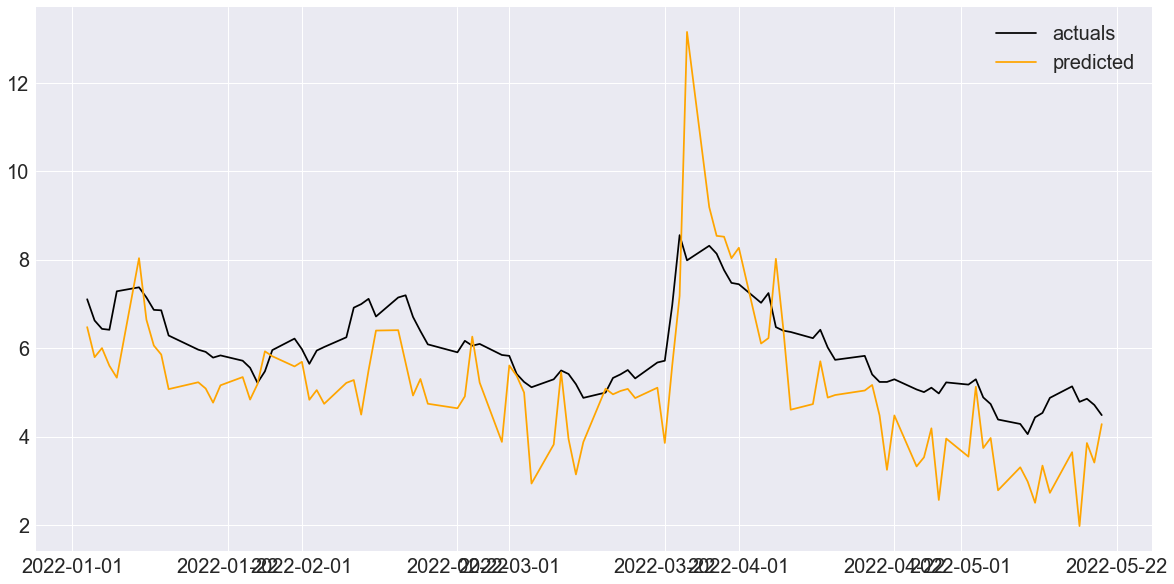

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['tlry_next_close'], color='black')
ax.plot(y_test0['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TLRY and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_tlry, df_etfs, on='Date', how='left')
df1

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000              NaN  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  NaN  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  NaN  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  NaN  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  NaN  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  NaN  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-17               -0.004   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.051   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.003   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.002   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.010   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [41]:
df_isna1 = df1.isna()
df_isna1

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-07-19                 True    False    False   False     False   
2018-07-20                 True    False    False   False     False   
2018-07-23                 True    False    False   False     False   
2018-07-24                 True    False    False   False     False   
2018-07-25                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-07-19      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  0.0  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  0.0  27.209999  27.379999  26.931000  26.959999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   
2018-07-24     289200      27.650000      26.959999 -0.520001   -0.018807   
2018-07-25     217300      27.129999      26.400000 -0.170000   -0.006266   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   
2018-07-24          27.468000            -0.060              28.002   
2018-07-25          27.288000            -0.180              27.763   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   
2018-07-24             -0.236        0.0        0.0       0.0         0.0   
2018-07-25             -0.239        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0            

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000         0.000000  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                0.000  27.650000  27.839001  27.400999  27.440001   
2018-07-20                0.000  27.450001  27.704000  27.219999  27.260000   
2018-07-23                0.000  27.270000  27.929001  27.260000  27.650000   
2018-07-24                0.000  27.860001  27.900000  26.990000  27.129999   
2018-07-25                0.000  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-17               -0.004   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.051   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.003   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.002   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.010   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   4.980000   5.170000   4.890000   
2022-05-18      5   18  2022        2   5.010000   5.170000   4.760000   
2022-05-19      5   19  2022        2   4.780000   4.970000   4.690000   
2022-05-20      5   20  2022        2   4.930000   4.960000   4.550000   
2022-05-23      5   23  2022        2   4.740000   4.750000   4.450000   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   
...                ...          ...              ...              ...   
2022-05-17    5.140000     25498100         4.880000         4.790000   
2022-05-18    4.790000     23769100         5.140000         4.860000   
2022-05-19    4.860000     21098700         4.790000         4.720000   
2022-05-20    4.720000     20260200         4.860000         4.490000   
2022-05-23    4.490000     19350600         4.720000         0.000000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000               0.000   
2018-07-20   7.380001      0.329611                0.000               0.000   
2018-07-23  -0.319999     -0.010749                0.000               0.000   
2018-07-24  -4.090000     -0.138879                0.000               0.000   
2018-07-25   1.129999      0.044558               26.692               0.000   
...               ...           ...                  ...                 ...   
2022-05-17   0.260000      0.053279                4.612               0.170   
2022-05-18  -0.350000     -0.068093                4.758               0.146   
2022-05-19   0.070000      0.014614                4.842               0.084   
2022-05-20  -0.140000     -0.028807                4.878               0.036   
2022-05-23  -0.230000     -0.048729                4.800              -0.078   

            tlry_10day_avg_close  tlry_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-07-19                 0.000                0.000  27.650000  27.839001   
2018-07-20                 0.000                0.000  27.450001  27.704000   
2018-07-23                 0.000                0.000  27.270000  27.929001   
2018-07-24                 0.000                0.000  27.860001  27.900000   
2018-07-25                 0.000                0.000  27.209999  27.379999   
...                          ...                  ...        ...        ...   
2022-05-17                 4.667               -0.004   7.990000   8.170000   
2022-05-18                 4.616               -0.051   7.940000   8.030000   
2022-05-19                 4.613               -0.003   7.560000   7.860000   
2022-05-20                 4.611               -0.002   7.860000   7.860000   
2022-05-23                 4.621                0.010   7.620000   7.640000   

               mj_Low   mj_Clo

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

871

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

871
97


In [52]:
X_train1 = train1.drop('tlry_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-07-19           0.0                  0.0                 0.0   
2018-07-20           0.0                  0.0                 0.0   
2018-07-23           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-07-19                   0.0                  0.0        0.0        0.0   
2018-07-20                   0.0                  0.0        0.0        0.0   
2018-07-23                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-07-19       0.0         0.0          0.0              0.0   
2018-07-20       0.0    

In [53]:
X_train1.shape

(871, 159)

In [54]:
y_train1 = train1['tlry_next_close']
y_train1.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('tlry_next_close', axis=1)
y_test1 = test1['tlry_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2022-01-03      1    3  2022        1       7.19       7.70      7.08   
2022-01-04      1    4  2022        1       7.46       7.48      6.96   
2022-01-05      1    5  2022        1       7.06       7.29      6.61   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2022-01-03        7.39     21556900             7.03       0.36      0.051209   
2022-01-04        7.11     24622800             7.39      -0.28     -0.037889   
2022-01-05        6.63     30015800             7.11      -0.48     -0.067511   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2022-01-03                7.206              -0.044                 7.453   
2022-01-04                7.172              -0.034                 7.418   
2022-01-05                7.088              -0.084                 7.296   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2022-01-03               -0.059    11.21    11.59   11.09     11.43   
2022-01-04               -0.035    11.49    11.49   11.10     11.29   
2022-01-05               -0.122    11.24    11.42   10.77     10.77   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2022-01-03    1204900          11.08          11.29     0.35    0.031588   
2022-01-04    1065400          11.43          10.77    -0.14   -0.012248   
2022-01-05    1626700          11.29          10.68    -0.52   -0.046058   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2022-01-03             11.210            -0.036              11.346   
2022-01-04             11.212             0.002              11.367   
2022-01-05             11.156            -0.056              11.295   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2022-01-03             -0.005      25.93      26.51  25.709999   25.790001   
2022-01-04              0.021      26.00      26.00  24.730000   24.780001   
2022-01-05             -0.072      25.00      25.00  23.233999   23.389999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2022-01-03    1431400.0        25.590000        24.780001   0.200001   
2022-01-04    1284800.0        25.790001        23.389999  -1.010000   
2022-01-05    1830100.0        24.780001        23.879999  -1.390002   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2022-01-03      0.007816               25.318               0.100   
2022-01-04     -0.039162               25.334               0.016   
2022-01-05     -0.056094               25.004              -0.330   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2022-01-03             24.868000                0.169      12.96     13.341   
2022-01-04             25.019001                0.151      13.10     13.200   
2022-01-05             24.997000               -0.022      12.86     12.950   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2022-01-03    12.960       13.21     174000.0            13.00   
2022-01-04    12.771       12.95     147500.0            13.21   
202

In [58]:
X_test1.shape

(97, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([4.96044664, 3.16799026, 4.77686581, 5.53793908, 6.19719155])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

2.1388285180027946


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

1.92799648815411


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['tlry_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['tlry_next_close'])

In [65]:
y_test1['tlry_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              3.652235
2022-05-17             4.79              1.685837
2022-05-18             4.86              3.711050
2022-05-19             4.72              1.213174
2022-05-20             4.49              1.830046

In [67]:
hyper_table.append(dict(stock='tlry', version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['tlry_next_close'][-1],
                        predicted_price=y_test1['tlry_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

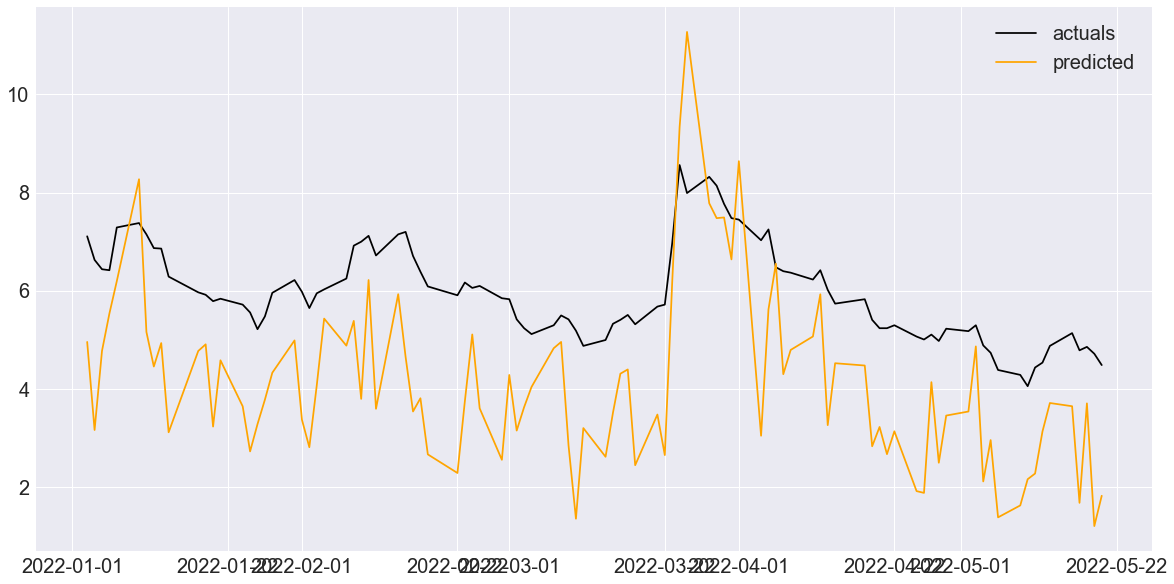

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['tlry_next_close'], color='black')
ax.plot(y_test1['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TLRY, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_tlry, df_etfs_dow, on='Date', how='left')
df2

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000              NaN  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  NaN  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  NaN  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  NaN  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  NaN  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  NaN  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-17               -0.004   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.051   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.003   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.002   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.010   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [71]:
df_isna2 = df2.isna()
df_isna2

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-07-19                 True    False    False   False     False   
2018-07-20                 True    False    False   False     False   
2018-07-23                 True    False    False   False     False   
2018-07-24                 True    False    False   False     False   
2018-07-25                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-07-19      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  0.0  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  0.0  27.209999  27.379999  26.931000  26.959999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   
2018-07-24     289200      27.650000      26.959999 -0.520001   -0.018807   
2018-07-25     217300      27.129999      26.400000 -0.170000   -0.006266   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   
2018-07-24          27.468000            -0.060              28.002   
2018-07-25          27.288000            -0.180              27.763   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   
2018-07-24             -0.236        0.0        0.0       0.0         0.0   
2018-07-25             -0.239        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0            

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-17   4.980000   5.170000   4.890000    5.140000     25498100   
2022-05-18   5.010000   5.170000   4.760000    4.790000     23769100   
2022-05-19   4.780000   4.970000   4.690000    4.860000     21098700   
2022-05-20   4.930000   4.960000   4.550000    4.720000     20260200   
2022-05-23   4.740000   4.750000   4.450000    4.490000     19350600   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-17         4.880000         4.790000   0.260000      0.053279   
2022-05-18         5.140000         4.860000  -0.350000     -0.068093   
2022-05-19         4.790000         4.720000   0.070000      0.014614   
2022-05-20         4.860000         4.490000  -0.140000     -0.028807   
2022-05-23         4.720000         0.000000  -0.230000     -0.048729   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                4.612               0.170                 4.667   
2022-05-18                4.758               0.146                 4.616   
2022-05-19                4.842               0.084                 4.613   
2022-05-20                4.878               0.036                 4.611   
2022-05-23                4.800              -0.078                 4.621   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                0.000  27.650000  27.839001  27.400999  27.440001   
2018-07-20                0.000  27.450001  27.704000  27.219999  27.260000   
2018-07-23                0.000  27.270000  27.929001  27.260000  27.650000   
2018-07-24                0.000  27.860001  27.900000  26.990000  27.129999   
2018-07-25                0.000  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-17               -0.004   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.051   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.003   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.002   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.010   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   4.980000   5.170000   4.890000   
2022-05-18      5   18  2022        2   5.010000   5.170000   4.760000   
2022-05-19      5   19  2022        2   4.780000   4.970000   4.690000   
2022-05-20      5   20  2022        2   4.930000   4.960000   4.550000   
2022-05-23      5   23  2022        2   4.740000   4.750000   4.450000   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   
...                ...          ...              ...              ...   
2022-05-17    5.140000     25498100         4.880000         4.790000   
2022-05-18    4.790000     23769100         5.140000         4.860000   
2022-05-19    4.860000     21098700         4.790000         4.720000   
2022-05-20    4.720000     20260200         4.860000         4.490000   
2022-05-23    4.490000     19350600         4.720000         0.000000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000               0.000   
2018-07-20   7.380001      0.329611                0.000               0.000   
2018-07-23  -0.319999     -0.010749                0.000               0.000   
2018-07-24  -4.090000     -0.138879                0.000               0.000   
2018-07-25   1.129999      0.044558               26.692               0.000   
...               ...           ...                  ...                 ...   
2022-05-17   0.260000      0.053279                4.612               0.170   
2022-05-18  -0.350000     -0.068093                4.758               0.146   
2022-05-19   0.070000      0.014614                4.842               0.084   
2022-05-20  -0.140000     -0.028807                4.878               0.036   
2022-05-23  -0.230000     -0.048729                4.800              -0.078   

            tlry_10day_avg_close  tlry_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-07-19                 0.000                0.000  27.650000  27.839001   
2018-07-20                 0.000                0.000  27.450001  27.704000   
2018-07-23                 0.000                0.000  27.270000  27.929001   
2018-07-24                 0.000                0.000  27.860001  27.900000   
2018-07-25                 0.000                0.000  27.209999  27.379999   
...                          ...                  ...        ...        ...   
2022-05-17                 4.667               -0.004   7.990000   8.170000   
2022-05-18                 4.616               -0.051   7.940000   8.030000   
2022-05-19                 4.613               -0.003   7.560000   7.860000   
2022-05-20                 4.611               -0.002   7.860000   7.860000   
2022-05-23                 4.621                0.010   7.620000   7.640000   

               mj_Low   mj_Clo

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

871

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

871
97


In [82]:
X_train2 = train2.drop('tlry_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-07-19           0.0                  0.0                 0.0   
2018-07-20           0.0                  0.0                 0.0   
2018-07-23           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-07-19                   0.0                  0.0        0.0        0.0   
2018-07-20                   0.0                  0.0        0.0        0.0   
2018-07-23                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-07-19       0.0         0.0          0.0              0.0   
2018-07-20       0.0    

In [83]:
X_train2.shape

(871, 185)

In [84]:
y_train2 = train2['tlry_next_close']
y_train2.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('tlry_next_close', axis=1)
y_test2 = test2['tlry_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2022-01-03      1    3  2022        1       7.19       7.70      7.08   
2022-01-04      1    4  2022        1       7.46       7.48      6.96   
2022-01-05      1    5  2022        1       7.06       7.29      6.61   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2022-01-03        7.39     21556900             7.03       0.36      0.051209   
2022-01-04        7.11     24622800             7.39      -0.28     -0.037889   
2022-01-05        6.63     30015800             7.11      -0.48     -0.067511   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2022-01-03                7.206              -0.044                 7.453   
2022-01-04                7.172              -0.034                 7.418   
2022-01-05                7.088              -0.084                 7.296   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2022-01-03               -0.059    11.21    11.59   11.09     11.43   
2022-01-04               -0.035    11.49    11.49   11.10     11.29   
2022-01-05               -0.122    11.24    11.42   10.77     10.77   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2022-01-03    1204900          11.08          11.29     0.35    0.031588   
2022-01-04    1065400          11.43          10.77    -0.14   -0.012248   
2022-01-05    1626700          11.29          10.68    -0.52   -0.046058   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2022-01-03             11.210            -0.036              11.346   
2022-01-04             11.212             0.002              11.367   
2022-01-05             11.156            -0.056              11.295   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2022-01-03             -0.005      25.93      26.51  25.709999   25.790001   
2022-01-04              0.021      26.00      26.00  24.730000   24.780001   
2022-01-05             -0.072      25.00      25.00  23.233999   23.389999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2022-01-03    1431400.0        25.590000        24.780001   0.200001   
2022-01-04    1284800.0        25.790001        23.389999  -1.010000   
2022-01-05    1830100.0        24.780001        23.879999  -1.390002   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2022-01-03      0.007816               25.318               0.100   
2022-01-04     -0.039162               25.334               0.016   
2022-01-05     -0.056094               25.004              -0.330   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2022-01-03             24.868000                0.169      12.96     13.341   
2022-01-04             25.019001                0.151      13.10     13.200   
2022-01-05             24.997000               -0.022      12.86     12.950   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2022-01-03    12.960       13.21     174000.0            13.00   
2022-01-04    12.771       12.95     147500.0            13.21   
202

In [88]:
X_test2.shape

(97, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([4.8132903 , 3.4511785 , 5.33440989, 5.98106206, 6.70416625])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

1.9369774057265965


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

1.7411954627670652


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['tlry_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['tlry_next_close'])

In [95]:
y_test2['tlry_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              2.990956
2022-05-17             4.79              2.246270
2022-05-18             4.86              4.180543
2022-05-19             4.72              0.610292
2022-05-20             4.49              1.421000

In [97]:
hyper_table.append(dict(stock='tlry', version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['tlry_next_close'][-1],
                        predicted_price=y_test2['tlry_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

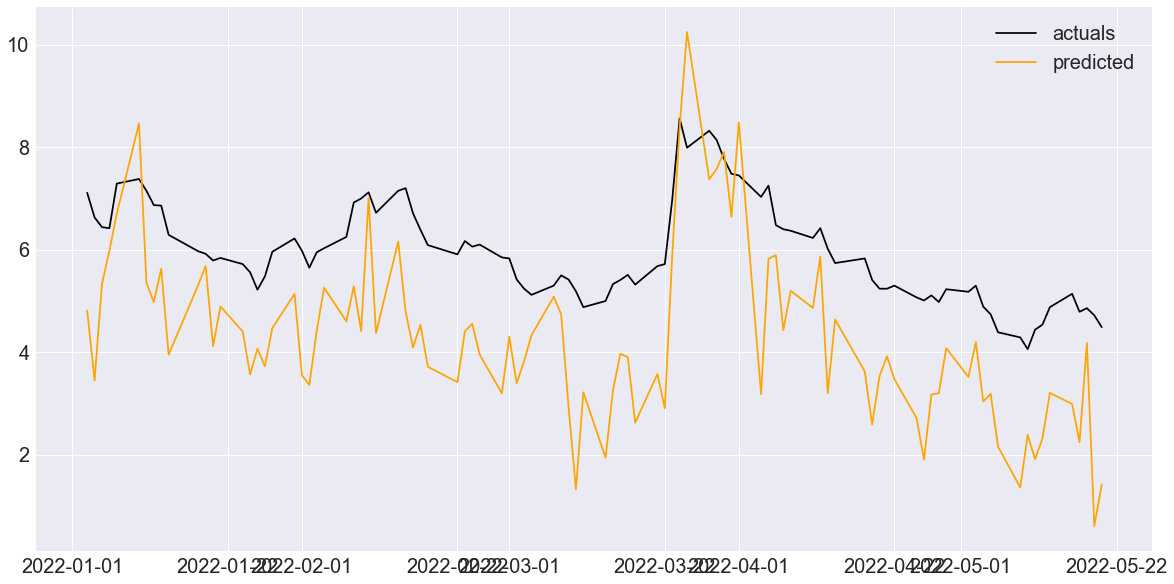

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['tlry_next_close'], color='black')
ax.plot(y_test2['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483       0.000        0.00   
2018-07-20               27.709              -0.573       0.000        0.00   
2018-07-23               27.313              -0.396       0.000        0.00   
2018-07-24               26.927              -0.386       0.000        0.00   
2018-07-25               26.536              -0.391       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

871

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

871
97


In [112]:
X_train3 = train3.drop('tlry_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [113]:
X_train3.shape

(871, 263)

In [114]:
y_train3 = train3['tlry_next_close']
y_train3.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('tlry_next_close', axis=1)
y_test3 = test3['tlry_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-03         6.75      617200.0              6.67              6.55   
2022-01-04         6.55      465200.0              6.75              6.07   
2022-01-05         6.07     1301600.0              6.55              6.32   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-03        0.08       0.011994                 6.638   
2022-01-04       -0.20      -0.029630                 6.648   
2022-01-05       -0.48      -0.073282                 6.540   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-03               -0.026                 6.5559                0.0090   
2022-01-04                0.010                 6.5849                0.0290   
2022-01-05               -0.108                 6.5730               -0.0119   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-03       3.99       4.29      3.94        4.20    2695300.0   
2022-01-04       4.14       4.18      3.95        4.11    2775200.0   
2022-01-05       4.06       4.19      3.85        3.86    2504300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-03             3.92             4.11       0.28      0.071429   
2022-01-04             4.20             3.86      -0.09     -0.021429   
2022-01-05             4.11             3.81      -0.25     -0.060827   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-03                3.988               0.004                 4.097   
2022-01-04                4.018               0.030                 4.098   
2022-01-05                4.020               0.002                 4.057   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-03               -0.011        8.99       9.450      8.642   
2022-01-04                0.001        8.80       8.905      8

In [118]:
X_test3.shape

(97, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([8.32130471, 3.81874147, 3.71309229, 2.07624854, 4.13799285])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

3.8607595407424697


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

3.361888623651583


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['tlry_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['tlry_next_close'])

In [125]:
y_test3['tlry_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              1.445796
2022-05-17             4.79             -0.838604
2022-05-18             4.86             -0.171642
2022-05-19             4.72             -1.117647
2022-05-20             4.49             -2.706205

In [127]:
hyper_table.append(dict(stock='tlry', version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['tlry_next_close'][-1],
                        predicted_price=y_test3['tlry_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

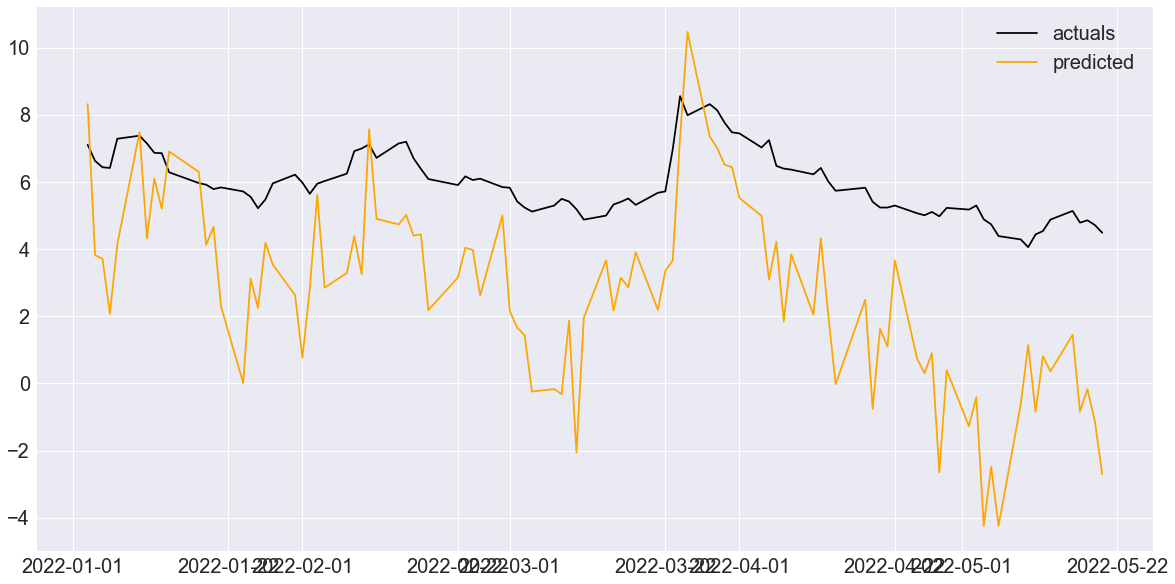

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['tlry_next_close'], color='black')
ax.plot(y_test3['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483       0.000        0.00   
2018-07-20               27.709              -0.573       0.000        0.00   
2018-07-23               27.313              -0.396       0.000        0.00   
2018-07-24               26.927              -0.386       0.000        0.00   
2018-07-25               26.536              -0.391       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

871

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

871
97


In [142]:
X_train4 = train4.drop('tlry_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [143]:
X_train4.shape

(871, 289)

In [144]:
y_train4 = train4['tlry_next_close']
y_train4.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('tlry_next_close', axis=1)
y_test4 = test4['tlry_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-03         6.75      617200.0              6.67              6.55   
2022-01-04         6.55      465200.0              6.75              6.07   
2022-01-05         6.07     1301600.0              6.55              6.32   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-03        0.08       0.011994                 6.638   
2022-01-04       -0.20      -0.029630                 6.648   
2022-01-05       -0.48      -0.073282                 6.540   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-03               -0.026                 6.5559                0.0090   
2022-01-04                0.010                 6.5849                0.0290   
2022-01-05               -0.108                 6.5730               -0.0119   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-03       3.99       4.29      3.94        4.20    2695300.0   
2022-01-04       4.14       4.18      3.95        4.11    2775200.0   
2022-01-05       4.06       4.19      3.85        3.86    2504300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-03             3.92             4.11       0.28      0.071429   
2022-01-04             4.20             3.86      -0.09     -0.021429   
2022-01-05             4.11             3.81      -0.25     -0.060827   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-03                3.988               0.004                 4.097   
2022-01-04                4.018               0.030                 4.098   
2022-01-05                4.020               0.002                 4.057   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-03               -0.011        8.99       9.450      8.642   
2022-01-04                0.001        8.80       8.905      8

In [148]:
X_test4.shape

(97, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([8.33755139, 3.54485838, 3.4805774 , 2.11641239, 4.74388922])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

3.9985074340040314


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

3.481390444762749


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['tlry_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['tlry_next_close'])

In [155]:
y_test4['tlry_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              0.654388
2022-05-17             4.79             -0.900926
2022-05-18             4.86             -1.035854
2022-05-19             4.72             -1.645565
2022-05-20             4.49             -2.955076

In [157]:
hyper_table.append(dict(stock='tlry', version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['tlry_next_close'][-1],
                        predicted_price=y_test4['tlry_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

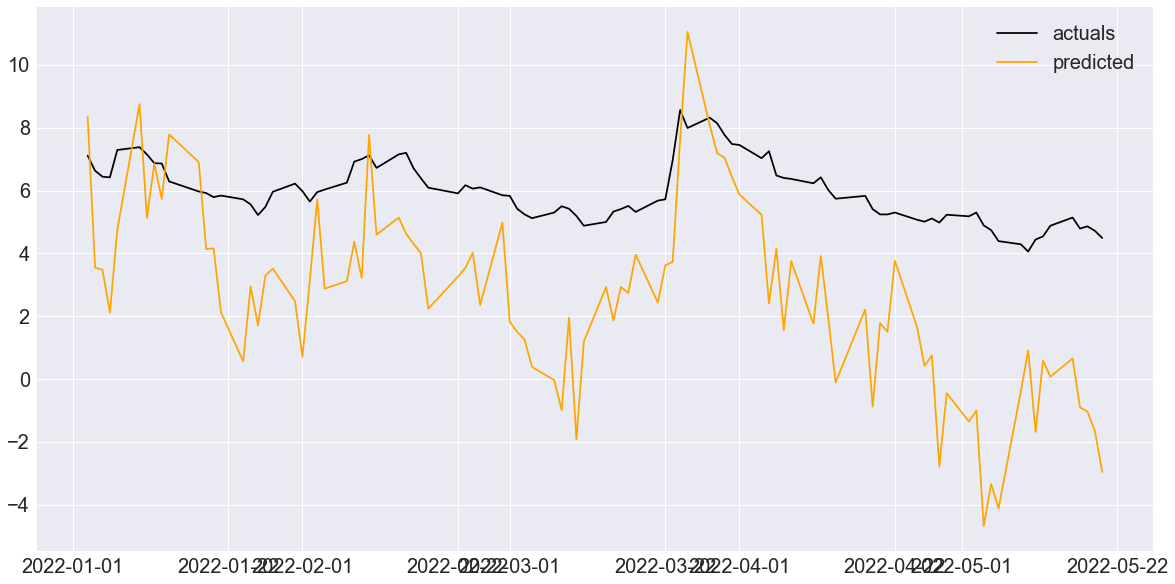

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['tlry_next_close'], color='black')
ax.plot(y_test4['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483       0.000        0.00   
2018-07-20               27.709              -0.573       0.000        0.00   
2018-07-23               27.313              -0.396       0.000        0.00   
2018-07-24               26.927              -0.386       0.000        0.00   
2018-07-25               26.536              -0.391       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

871

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

871
97


In [172]:
X_train5 = train5.drop('tlry_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [173]:
X_train5.shape

(871, 393)

In [174]:
y_train5 = train5['tlry_next_close']
y_train5.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('tlry_next_close', axis=1)
y_test5 = test5['tlry_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-03         6.75      617200.0              6.67              6.55   
2022-01-04         6.55      465200.0              6.75              6.07   
2022-01-05         6.07     1301600.0              6.55              6.32   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-03        0.08       0.011994                 6.638   
2022-01-04       -0.20      -0.029630                 6.648   
2022-01-05       -0.48      -0.073282                 6.540   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-03               -0.026                 6.5559                0.0090   
2022-01-04                0.010                 6.5849                0.0290   
2022-01-05               -0.108                 6.5730               -0.0119   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-03       3.99       4.29      3.94        4.20    2695300.0   
2022-01-04       4.14       4.18      3.95        4.11    2775200.0   
2022-01-05       4.06       4.19      3.85        3.86    2504300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-03             3.92             4.11       0.28      0.071429   
2022-01-04             4.20             3.86      -0.09     -0.021429   
2022-01-05             4.11             3.81      -0.25     -0.060827   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-03                3.988               0.004                 4.097   
2022-01-04                4.018               0.030                 4.098   
2022-01-05                4.020               0.002                 4.057   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-03               -0.011        8.99       9.450      8.642   
2022-01-04                0.001        8.80       8.905      8

In [178]:
X_test5.shape

(97, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([9.63471113, 6.51054239, 6.14320114, 6.12634066, 6.31598715])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

3.5484708000545004


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

3.0632149070095656


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['tlry_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['tlry_next_close'])

In [185]:
y_test5['tlry_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              1.928486
2022-05-17             4.79             -2.756673
2022-05-18             4.86             -0.204376
2022-05-19             4.72             -1.944303
2022-05-20             4.49             -2.553856

In [187]:
hyper_table.append(dict(stock='tlry', version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['tlry_next_close'][-1],
                        predicted_price=y_test5['tlry_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

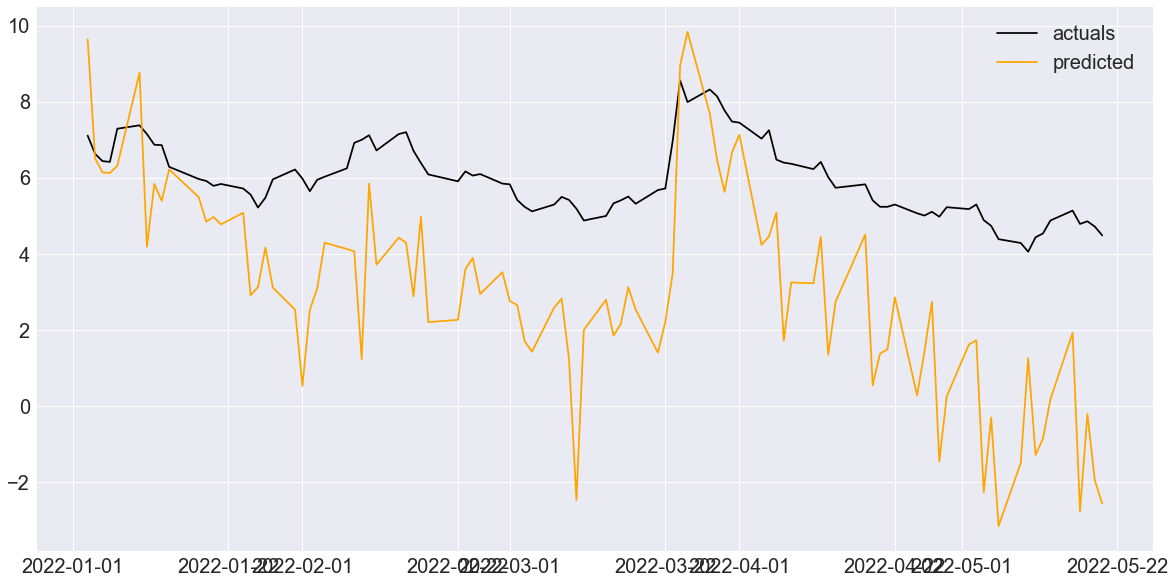

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['tlry_next_close'], color='black')
ax.plot(y_test5['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483       0.000        0.00   
2018-07-20               27.709              -0.573       0.000        0.00   
2018-07-23               27.313              -0.396       0.000        0.00   
2018-07-24               26.927              -0.386       0.000        0.00   
2018-07-25               26.536              -0.391       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

871

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

871
97


In [202]:
X_train6 = train6.drop('tlry_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [203]:
X_train6.shape

(871, 419)

In [204]:
y_train6 = train6['tlry_next_close']
y_train6.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-29    7.28
2021-12-30    7.03
2021-12-31    7.39
Name: tlry_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('tlry_next_close', axis=1)
y_test6 = test6['tlry_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-03         6.75      617200.0              6.67              6.55   
2022-01-04         6.55      465200.0              6.75              6.07   
2022-01-05         6.07     1301600.0              6.55              6.32   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-03        0.08       0.011994                 6.638   
2022-01-04       -0.20      -0.029630                 6.648   
2022-01-05       -0.48      -0.073282                 6.540   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-03               -0.026                 6.5559                0.0090   
2022-01-04                0.010                 6.5849                0.0290   
2022-01-05               -0.108                 6.5730               -0.0119   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-03       3.99       4.29      3.94        4.20    2695300.0   
2022-01-04       4.14       4.18      3.95        4.11    2775200.0   
2022-01-05       4.06       4.19      3.85        3.86    2504300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-03             3.92             4.11       0.28      0.071429   
2022-01-04             4.20             3.86      -0.09     -0.021429   
2022-01-05             4.11             3.81      -0.25     -0.060827   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-03                3.988               0.004                 4.097   
2022-01-04                4.018               0.030                 4.098   
2022-01-05                4.020               0.002                 4.057   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-03               -0.011        8.99       9.450      8.642   
2022-01-04                0.001        8.80       8.905      8

In [208]:
X_test6.shape

(97, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    4.86
2022-05-19    4.72
2022-05-20    4.49
Name: tlry_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([7.95035875, 5.10624377, 5.28148211, 5.31490338, 5.91734392])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

3.7811162669427607


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

3.358163990687283


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['tlry_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['tlry_next_close'])

In [215]:
y_test6['tlry_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-16             5.14              1.243760
2022-05-17             4.79             -1.952084
2022-05-18             4.86              0.413396
2022-05-19             4.72             -1.740219
2022-05-20             4.49             -2.259195

In [217]:
hyper_table.append(dict(stock='tlry', version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['tlry_next_close'][-1],
                        predicted_price=y_test6['tlry_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

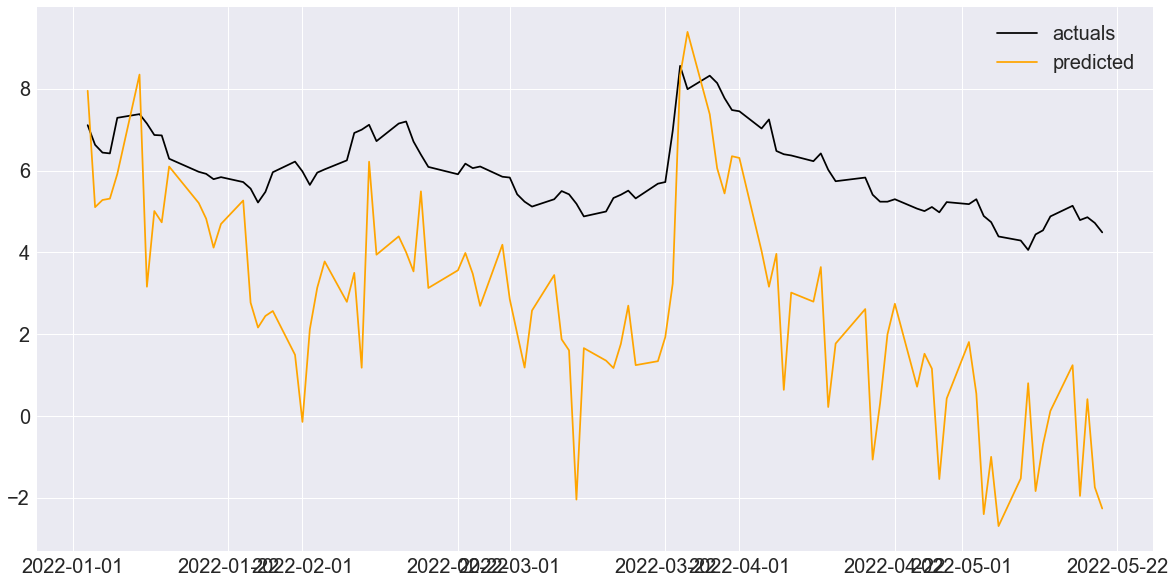

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['tlry_next_close'], color='black')
ax.plot(y_test6['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
0  tlry         1+Dow  LinearRegression()  1.289206  1.054205          4.49   
2  tlry    1+ETFs+Dow  LinearRegression()  1.936977  1.741195          4.49   
1  tlry        1+ETFs  LinearRegression()  2.138829  1.927996          4.49   
5  tlry      All+ETFs  LinearRegression()  3.548471  3.063215          4.49   
6  tlry  All+ETFs+Dow  LinearRegression()  3.781116  3.358164          4.49   
3  tlry    All stocks  LinearRegression()  3.860760  3.361889          4.49   
4  tlry       All+Dow  LinearRegression()  3.998507  3.481390          4.49   

   predicted_price  rows  train_rows  test_rows  columns  
0         4.286098   968         871         97       56  
2         1.421000   968         871         97      186  
1         1.830046   968         871         97      160  
5        -2.553856   968         871         97      394  
6        -2.259195   968         871         97      420  
3        -2.706205   968         871         97      264  
4        -2.955076   968         871         97      290

In [220]:
hyper_table_tlry = hyper_table.head(1)
hyper_table_tlry

stock version               model      rmse       mae  actual_price  \
0  tlry   1+Dow  LinearRegression()  1.289206  1.054205          4.49   

   predicted_price  rows  train_rows  test_rows  columns  
0         4.286098   968         871         97       56

In [221]:
hyper_table_tlry.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_tlry.csv', index=True)

## Simulation - Sell

In [222]:
tlry_sim = df0[n:]
tlry_sim = tlry_sim[['tlry_Open', 'tlry_Close']]
tlry_sim.head()

tlry_Open  tlry_Close
Date                             
2022-01-03       7.19        7.39
2022-01-04       7.46        7.11
2022-01-05       7.06        6.63
2022-01-06       6.67        6.44
2022-01-07       6.51        6.42

In [223]:
tlry_sim.shape

(97, 2)

In [224]:
tlry_sim.tail()

tlry_Open  tlry_Close
Date                             
2022-05-16       4.59        4.88
2022-05-17       4.98        5.14
2022-05-18       5.01        4.79
2022-05-19       4.78        4.86
2022-05-20       4.93        4.72

In [225]:
tlry_sim['tlry_Pred_Close'] = y_pred0
tlry_sim.head()

tlry_Open  tlry_Close  tlry_Pred_Close
Date                                              
2022-01-03       7.19        7.39         6.479676
2022-01-04       7.46        7.11         5.800279
2022-01-05       7.06        6.63         6.005336
2022-01-06       6.67        6.44         5.606284
2022-01-07       6.51        6.42         5.336586

In [226]:
tlry_sim['Trade'] = tlry_sim['tlry_Pred_Close'] > tlry_sim['tlry_Open']
tlry_sim.head()

tlry_Open  tlry_Close  tlry_Pred_Close  Trade
Date                                                     
2022-01-03       7.19        7.39         6.479676  False
2022-01-04       7.46        7.11         5.800279  False
2022-01-05       7.06        6.63         6.005336  False
2022-01-06       6.67        6.44         5.606284  False
2022-01-07       6.51        6.42         5.336586  False

In [227]:
tlry_sim = tlry_sim[tlry_sim['Trade']==True]
tlry_sim.head()

tlry_Open  tlry_Close  tlry_Pred_Close  Trade
Date                                                     
2022-01-10       7.16        7.29         8.039523   True
2022-01-27       5.57        5.22         5.933086   True
2022-01-28       5.24        5.48         5.821090   True
2022-01-31       5.50        5.96         5.591266   True
2022-02-24       5.50        6.17         6.264884   True

In [228]:
tlry_sim['Gains'] = (tlry_sim['tlry_Close'] - tlry_sim['tlry_Open'])*100
tlry_sim.head()

tlry_Open  tlry_Close  tlry_Pred_Close  Trade  Gains
Date                                                            
2022-01-10       7.16        7.29         8.039523   True   13.0
2022-01-27       5.57        5.22         5.933086   True  -35.0
2022-01-28       5.24        5.48         5.821090   True   24.0
2022-01-31       5.50        5.96         5.591266   True   46.0
2022-02-24       5.50        6.17         6.264884   True   67.0

In [229]:
total_gains = tlry_sim['Gains'].sum()
print(round(total_gains, 2))

219.0
